In [2]:
from PIL import Image
import numpy as np #must convert images into numpy arrays
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import os
import cv2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


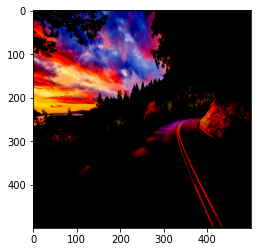

[1. 0.]


In [5]:
x_arr = [] #images
y_arr = [] #categories

#folder path for pedestrian pics and road pics
road_folder = 'roads'
ped_folder = 'pedestrians'

name_encode = {'road' : 0, 'Pedestrian' : 1}

def image_loader(folder, name):
    for x in os.listdir(folder):
        imgload = Image.open(os.path.join(folder, x)) #loading in pixel values of the image
        resize_img = Image.Image.resize(imgload, [500, 500]) #resizing array
        img_arr = np.array(resize_img) #adding pixel values for numpy array
        x_arr.append(img_arr) #append np array to array(x)
        y_arr.append(name_encode[name])
        #using cv2 to augment data
        image_flip = cv2.flip(img_arr, 1) # 1 means flipping around y axis. 0 means flipping around x axis.
        x_arr.append(img_flip)
        y_arr.append(name_encode[name])
        #can also use cv2.blur to blur image :) <-- another way to augment image

def show_img(index_img):
    plt.imshow(x_arr[index_img])
    plt.show()
    print(y_arr[index_img])


image_loader(road_folder, 'road')
image_loader(ped_folder, 'Pedestrian')

#known as 1 Hot encoding
y_arr = to_categorical(y_arr, num_classes= 2)
#making pixel values between 0 and 1

#x_arr = np.array(x_arr)
x_arr = (np.array(x_arr)- 127.5)/127.5
show_img(0)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 500, 500, 32)      2432      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 250, 250, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 250, 250, 100)     80100     
_________________________________________________________________
batch_normalization (BatchNo (None, 250, 250, 100)     400       
_________________________________________________________________
dropout (Dropout)            (None, 250, 250, 100)     0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 125, 125, 100)     0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 125, 125, 100)    

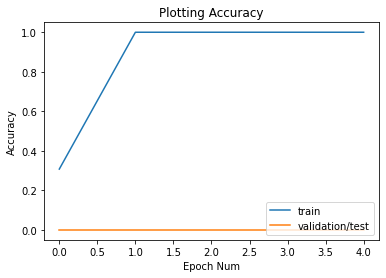

In [7]:
#BatchNormalizationa and Dropout are reqularization techniques to prevent overfitting
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPool2D, BatchNormalization, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
#softmax is another activation function. Gets the probability for each category.
#- The function is great for classification problems, especially if you’re dealing with multi-class classification problems, as it will report back the “confidence scorefor each class.
#- the scores returned by the softmax function will add up to 1

image_classifier_model = Sequential()
#Conv2D(#filters, (kernal size), zero-padding, activation-function, input_shape)
#below is a convolutional layer
image_classifier_model.add(Conv2D(32,(5, 5), padding= 'same', activation='relu', input_shape=(500,500,3)))# 3 represents the r, g, b values
#adding a pooling layer
#MaxPool2D(poolsize)
image_classifier_model.add(MaxPool2D(pool_size=(2,2)))
image_classifier_model.add(Conv2D(100,(5, 5), padding= 'same', activation='relu'))
image_classifier_model.add(BatchNormalization())
image_classifier_model.add(Dropout(rate= 0.2))
image_classifier_model.add(MaxPool2D(pool_size=(2,2)))
image_classifier_model.add(Conv2D(100,(5, 5), padding= 'same', activation='relu'))
image_classifier_model.add(BatchNormalization())
image_classifier_model.add(Dropout(rate= 0.2))
image_classifier_model.add(MaxPool2D(pool_size=(2,2)))
image_classifier_model.add(Flatten()) #converts matrix into a single array
image_classifier_model.add(Dense(124, activation='relu'))
image_classifier_model.add(Dense(2, activation='sigmoid'))
image_classifier_model.summary()


x_train, x_test, y_train, y_test = train_test_split(x_arr, y_arr, test_size= 0.33)
#lr means learning rate
opitmize = Adam(lr= 0.0001)


image_classifier_model.compile(optimizer= opitmize, loss='binary_crossentropy',  metrics= ['accuracy'])
dlmodel =image_classifier_model.fit(x_train, y_train, epochs= 5, batch_size= 100, verbose= 2, validation_split=0.05)

plt.plot(dlmodel.history['accuracy'], label= 'train')
plt.plot(dlmodel.history['val_accuracy'], label= 'validation/test')
plt.title('Plotting Accuracy')
plt.xlabel('Epoch Num')
plt.ylabel('Accuracy')
plt.legend(loc= 'lower right')
plt.show()



In [8]:
image_classifier_model.save('CNN-example-image-classifier.h5')


In [15]:
from keras.models import load_model
model_loaded = load_model('CNN-example-image-classifier.h5')
def predictions(index_number):
    img = (np.array(x_arr[index_number]) - 127.5)/ 127.5 #normalizing the data
    img = img.reshape(1, 100, 100, 3)
    prediction =model_loaded.predict_classes(img)
    print(prediction[0])
    if(0<= prediction <= 0.5):
        return "road"
    else:
        return "Pedestrians"

predictions(2)

ValueError: cannot reshape array of size 750000 into shape (1,100,100,3)